In [1]:
import pandas as pd
import numpy as np
import IPython.display as ipd
import librosa
import matplotlib.pyplot as plt

data = pd.read_csv('df_mfcc(1).csv')
data.head()

Unnamed: 0 genre                                          file_path  \
0           0  jazz  BDSMusicGenreClassification/genres/jazz/jazz.0...   
1           1  jazz  BDSMusicGenreClassification/genres/jazz/jazz.0...   
2           2  jazz  BDSMusicGenreClassification/genres/jazz/jazz.0...   
3           3  jazz  BDSMusicGenreClassification/genres/jazz/jazz.0...   
4           4  jazz  BDSMusicGenreClassification/genres/jazz/jazz.0...   

            0           1          2          3          4          5  \
0 -404.386149  143.730250 -10.996055  46.391142  19.850791  18.012855   
1 -176.864424  119.850149 -35.432433  77.790154 -39.544403  39.667435   
2 -214.989641  147.672901   5.786964  57.376007  -1.528937  25.839423   
3 -187.663020  159.640804 -56.653528  62.571707  -6.155235  16.654767   
4 -302.911769  150.462861 -36.050566  71.555614  -9.980160  18.034374   

           6    ...            30        31        32        33        34  \
0  11.840949    ...      6.990493  7.888843  5.993861  6.818160  8.091907   
1 -23.298894    ...      6.590067  7.124468  5.761781  5.910253  5.878076   
2  -3.662931    ...      8.569992  8.686751  6.789348  7.934242  9.286773   
3  14.840050    ...      7.995187  7.982266  8.597374  7.936251  8.679452   
4  -2.349320    ...      5.621115  5.764287  5.893719  5.593331  5.884514   

         35        36        37         38         39  
0  7.910559  7.793725  9.318736  10.571867   8.927506  
1  6.483721  6.641683  6.800667   5.720091   6.091751  
2  8.387410  9.124897  8.481165   8.570303   8.898348  
3  8.876587  9.218477  9.194124   9.653700   8.878288  
4  6.760427  5.678465  6.314960   8.101569  10.250414  

[5 rows x 43 columns]

In [2]:
l = list(data['genre'].unique())
data['genre'] = data['genre'].apply(lambda x: l.index(x))

In [3]:
X = np.array(data.iloc[:,3:43])
y = data['genre']

In [4]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(X)
x_scaled = min_max_scaler.transform(X)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [6]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(40,)),
    keras.layers.Dense(40, activation=tf.nn.relu),
    keras.layers.Dense(40, activation=tf.nn.relu),
    keras.layers.Dense(40, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [7]:
model.fit(X_train, y_train, epochs=300, batch_size=30)

Epoch 1/300
800/800 [==============================] - 0s 503us/step - loss: 2.3232 - acc: 0.1038
Epoch 2/300
800/800 [==============================] - 0s 50us/step - loss: 2.3084 - acc: 0.1263
Epoch 3/300
800/800 [==============================] - 0s 49us/step - loss: 2.2995 - acc: 0.1550
Epoch 4/300
800/800 [==============================] - 0s 49us/step - loss: 2.2925 - acc: 0.1638
Epoch 5/300
800/800 [==============================] - 0s 49us/step - loss: 2.2873 - acc: 0.1588
Epoch 6/300
800/800 [==============================] - 0s 51us/step - loss: 2.2823 - acc: 0.1525
Epoch 7/300
800/800 [==============================] - 0s 49us/step - loss: 2.2776 - acc: 0.1500
Epoch 8/300
800/800 [==============================] - 0s 50us/step - loss: 2.2725 - acc: 0.1713
Epoch 9/300
800/800 [==============================] - 0s 48us/step - loss: 2.2678 - acc: 0.1713
Epoch 10/300
800/800 [==============================] - 0s 50us/step - loss: 2.2626 - acc: 0.1788
Epoch 11/300
800/800 [======

800/800 [==============================] - 0s 50us/step - loss: 1.0713 - acc: 0.6113
Epoch 168/300
800/800 [==============================] - 0s 49us/step - loss: 1.0652 - acc: 0.5988
Epoch 169/300
800/800 [==============================] - 0s 50us/step - loss: 1.0562 - acc: 0.6163
Epoch 170/300
800/800 [==============================] - 0s 50us/step - loss: 1.0582 - acc: 0.6188
Epoch 171/300
800/800 [==============================] - 0s 49us/step - loss: 1.0665 - acc: 0.6050
Epoch 172/300
800/800 [==============================] - 0s 49us/step - loss: 1.0649 - acc: 0.6288
Epoch 173/300
800/800 [==============================] - 0s 50us/step - loss: 1.0599 - acc: 0.6013
Epoch 174/300
800/800 [==============================] - 0s 51us/step - loss: 1.0546 - acc: 0.6263
Epoch 175/300
800/800 [==============================] - 0s 48us/step - loss: 1.0559 - acc: 0.6000
Epoch 176/300
800/800 [==============================] - 0s 50us/step - loss: 1.0448 - acc: 0.6013
Epoch 177/300
800/800 [=

In [8]:
model.evaluate(X_test,y_test)

200/200 [==============================] - 0s 568us/step


[1.0638490533828735, 0.64]

In [28]:
import xgboost as xgb
# read in data
dtrain = xgb.DMatrix(Train_pred,label = y_train)
dtest = xgb.DMatrix(Test_pred)
xgbr = xgb.XGBClassifier(max_depth=7,reg_alpha=0.3, learning_rate=0.1, n_estimators=50, silent=True, objective='multi:softprob', booster='gbtree')
xgbr.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [29]:
pred = xgbr.predict(X_test)
len(pred[(pred==y_test)])/len(pred)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.64

In [9]:
Train_pred = model.predict(X_train)
Test_pred = model.predict(X_test)

In [47]:
def predict(filename):
    x, fs = librosa.load(filename)
    mfccs = librosa.feature.mfcc(x, sr=22050,n_mfcc=20)
    mfcc = pd.Series(np.hstack((np.mean(mfccs,axis=1),np.std(mfccs,axis=1))))
    mfcc = min_max_scaler.transform(mfcc.reshape(1,40))
    thisplot = plt.bar(range(10),model.predict(mfcc)[0])
    plt.ylim([0, 1])
    plt.xticks(range(10), l, rotation=45)
def xgbpredict(filename):
    x, fs = librosa.load(filename)
    mfccs = librosa.feature.mfcc(x, sr=22050,n_mfcc=20)
    mfcc = pd.Series(np.hstack((np.mean(mfccs,axis=1),np.std(mfccs,axis=1))))
    mfcc = min_max_scaler.transform(mfcc.reshape(1,40))
    thisplot = plt.bar(range(10),xgbr.predict_proba(mfcc)[0])
    plt.ylim([0, 1])
    plt.xticks(range(10), l, rotation=45)
def compare_predict(filename):
    plt.figure(figsize=(15,5))
    x, fs = librosa.load(filename)
    mfccs = librosa.feature.mfcc(x, sr=22050,n_mfcc=20)
    mfcc = pd.Series(np.hstack((np.mean(mfccs,axis=1),np.std(mfccs,axis=1))))
    mfcc = min_max_scaler.transform(mfcc.reshape(1,40))
    plt.subplot(121)
    nn_plot = plt.bar(range(10),model.predict(mfcc)[0])
    plt.title('Keras Predict')
    plt.ylim([0, 1])
    plt.xticks(range(10), l, rotation=45)
    plt.subplot(122)
    xgb_plot = plt.bar(range(10),xgbr.predict_proba(mfcc)[0])
    plt.title('XGB Predict')
    plt.ylim([0, 1])
    plt.xticks(range(10), l, rotation=45)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


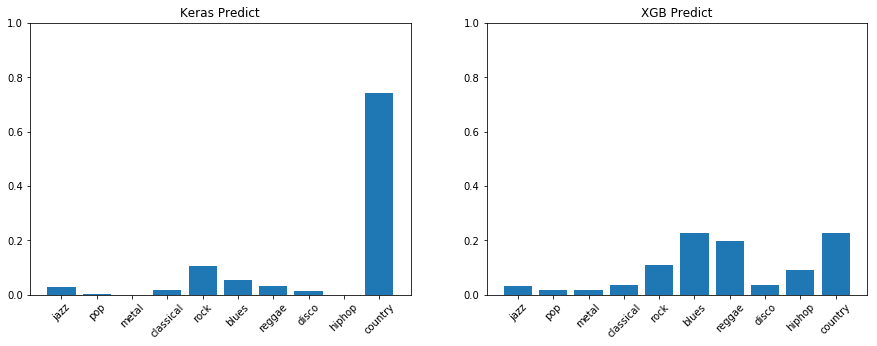

In [48]:
compare_predict('WalktheLine.ogg')
ipd.Audio('WalktheLine.ogg')

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


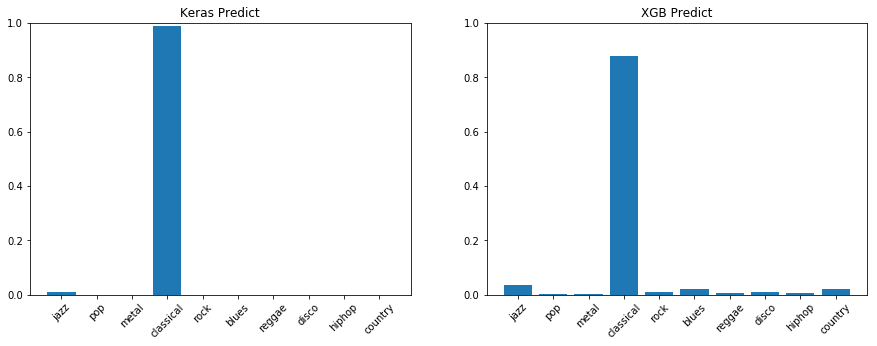

In [50]:
compare_predict('FurElise.ogg')
ipd.Audio('FurElise.ogg')

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


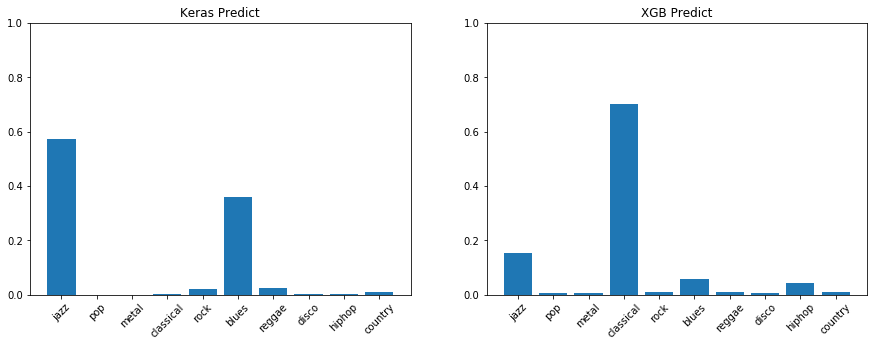

In [51]:
compare_predict('Good_Liquor_Gonna_Carry_Me_Down.ogg')
ipd.Audio('Good_Liquor_Gonna_Carry_Me_Down.ogg')

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


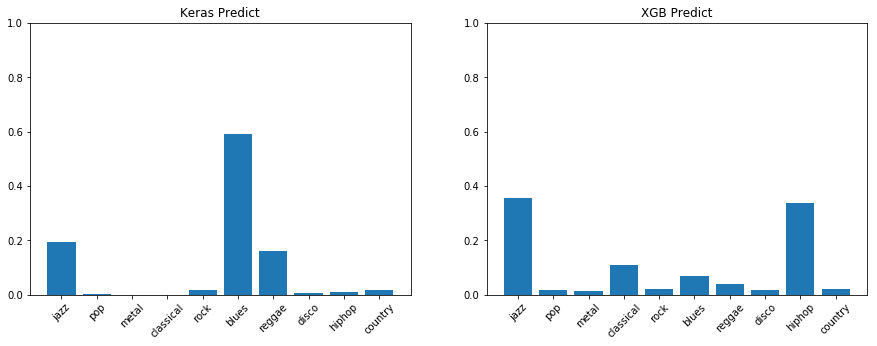

In [52]:
compare_predict('Viva_la_Vida.ogg')
ipd.Audio('Viva_la_Vida.ogg')

In [30]:
def xgbpredict(filename):
    x, fs = librosa.load(filename)
    mfccs = librosa.feature.mfcc(x, sr=22050,n_mfcc=20)
    mfcc = pd.Series(np.hstack((np.mean(mfccs,axis=1),np.std(mfccs,axis=1))))
    mfcc = min_max_scaler.transform(mfcc.reshape(1,40))
    thisplot = plt.bar(range(10),xgbr.predict_proba(mfcc)[0])
    plt.ylim([0, 1])
    plt.xticks(range(10), l, rotation=45)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


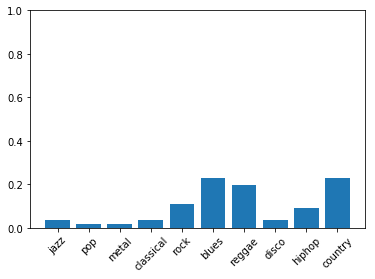

In [31]:
xgbpredict('WalktheLine.ogg')
ipd.Audio('WalktheLine.ogg')

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


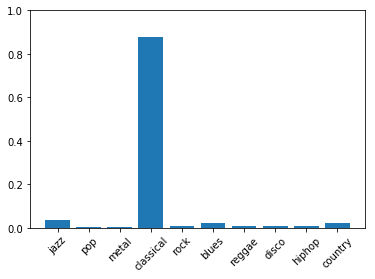

In [32]:
xgbpredict('FurElise.ogg')
ipd.Audio('FurElise.ogg')

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


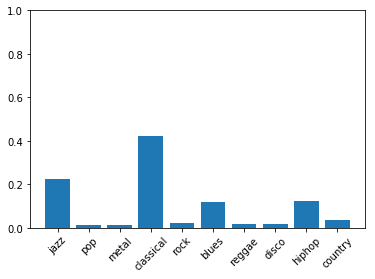

In [34]:
xgbpredict('Michael_Jackson_-_Beat_It.ogg')
ipd.Audio('Michael_Jackson_-_Beat_It.ogg')